In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#to read the datasets
df = pd.read_csv('energydata_complete (1).csv')

In [101]:
#view the first 5 rows of the dataset
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [102]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [103]:
#to select a sample of the dataset
simple_linear_reg_data = df[['T2','T6']].sample(15, random_state=2)
simple_linear_reg_data.head()

,T2,T6
1117,17.426667,-4.238889
16275,22.760000,14.690000
13272,21.230000,8.926667
3160,21.100000,7.690000
19210,21.856667,10.800000


<AxesSubplot:xlabel='T2', ylabel='T6'>

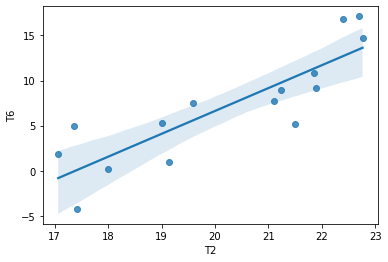

In [104]:
#regression plot
sns.regplot(x= 'T2', y= 'T6', data= simple_linear_reg_data)

In [105]:
df= df.drop(labels='date', axis=1, inplace=True)

In [106]:
# fit a linear model on the relationship between the temperature in the living room
# in Celsius (x = T2) and the temperature outside the building (y = T6)

#firstly,we normalise our dataset to a common scale using a minmax scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
features_df = normalised_df.drop(columns=[ 'date', 'lights'], axis= 1)
target_variable = normalised_df['Appliances']

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [107]:
target_variable.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: Appliances, dtype: float64

In [108]:
#to split our datasets into training and testing datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [120]:
x_train, x_test, y_train, y_test = train_test_split(features_df['T2'].
    values.reshape(-1, 1), features_df['T6'],test_size=0.7, random_state=42)

In [121]:
#to initialise the model
linear_model = LinearRegression()

#fit model to training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

#preview predictions
predicted_values

array([0.23985359, 0.47015846, 0.23158958, ..., 0.60281755, 0.35554971,
       0.46428666])

In [122]:
#R-SQUARED
from sklearn.metrics import r2_score

r2_ = r2_score(y_test,predicted_values)
round(r2_, 2)

0.64

In [123]:
#MAE
from sklearn.metrics import mean_absolute_error

mae= mean_absolute_error(y_test,predicted_values)
round(mae, 2)

0.08

In [124]:
#RSS
rss = np.sum(np.square(y_test - predicted_values))
round(rss,2)

156.69

In [125]:
#RMSE
from sklearn.metrics import mean_squared_error 

rmse =np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.106

In [126]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.4)

In [116]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [117]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights). reset_index()
    weights_df.columns =['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [119]:
linear_model_weights = get_weights_df(linear_model, x_train, 
                                         'Linear_Model_Weights')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df,
                         on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df,
                        on='Features')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'